## (찬웅)'고소득층(high_income)으로 분류되는 남성과 여성 각각의 생존율을 구하고, 그 수치를 막대그래프를 이용하여 시각화하시오.' 

#### (단, 고소득층(high_income)은 'Fare'가 전체 승객 내에 상위 25% 안에 들며, 'Pclass'가 1등급인 사람을 지칭한다.)

In [1]:
import pandas as pd
import numpy as np

In [2]:
titan = pd.read_csv('titanic/train.csv')

In [3]:
titan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# 변수해석부터!!
#0 : 승객 이름, 1 : 생존 여부, 2: 승객 등급, 3: 이름, 4: 성별,
#5: 나이, 6:사촌+배우자의 수,
#7: 부모님+아이들의 수, 8: 티켓번호, 9: 요금, 10: 선실, 11: 선착장(어디서 탔는지)

In [5]:
titan.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
titan['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [7]:
titan['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [8]:
high_income = (titan['Fare'] >= 31) & \
               (titan['Pclass'] == 1)

In [9]:
high_income.value_counts()

False    729
True     162
dtype: int64

In [10]:
titan1 = titan.assign(high_income = (titan['Fare'] >= 31) & \
               (titan['Pclass'] == 1))

In [11]:
titan1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,high_income
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,True
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,False
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,False
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,False
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,False


In [12]:
titan['high_income']=np.where(titan1['high_income']==True, 'high', 'low')

In [13]:
titan

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,high_income
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,low
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,high
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,low
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,high
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,low
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,low
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,low
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,low


In [14]:
titan1.groupby(['high_income','Sex'])['Survived'].value_counts()

high_income  Sex     Survived
False        female  1           148
                     0            79
             male    0           419
                     1            83
True         female  1            85
                     0             2
             male    0            49
                     1            26
Name: Survived, dtype: int64

In [15]:
titan1.groupby(['high_income','Survived'])['Sex'].value_counts()

high_income  Survived  Sex   
False        0         male      419
                       female     79
             1         female    148
                       male       83
True         0         male       49
                       female      2
             1         female     85
                       male       26
Name: Sex, dtype: int64

In [16]:
t_survived=titan.groupby(['high_income','Sex'],\
                          as_index =False) \
                         ['Survived'].mean()

In [17]:
t_survived

,high_income,Sex,Survived
0,high,female,0.977011
1,high,male,0.346667
2,low,female,0.651982
3,low,male,0.165339


In [18]:
t_survived=t_survived.sort_values(by = ['high_income', 'Sex'], \
                      ascending = [False,False])

In [19]:
t_survived['Survived'].loc[3] *100 #남자의 생존률

16.533864541832667

In [20]:
t_survived['Survived'].loc[2] *100 #여자의 생존률

65.19823788546255

In [21]:
t_survived

,high_income,Sex,Survived
3,low,male,0.165339
2,low,female,0.651982
1,high,male,0.346667
0,high,female,0.977011


In [22]:
import seaborn as sns

In [23]:
t_survived

,high_income,Sex,Survived
3,low,male,0.165339
2,low,female,0.651982
1,high,male,0.346667
0,high,female,0.977011


<AxesSubplot:xlabel='Sex', ylabel='Survived'>

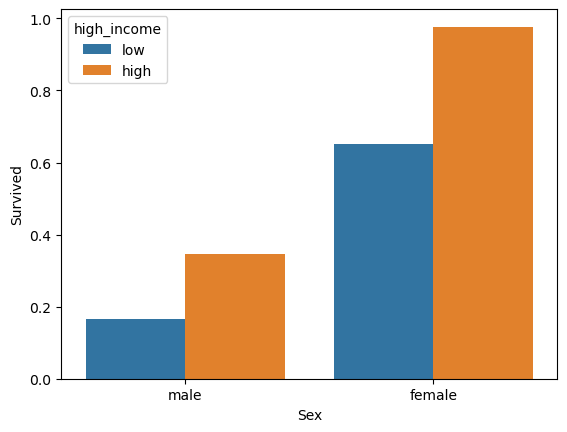

In [24]:
sns.barplot(data=t_survived, x= 'Sex',\
            y='Survived',  hue = 'high_income')

In [25]:
t_survived.sort_values('high_income', ascending=False, inplace=True)

In [26]:
t_survived

,high_income,Sex,Survived
3,low,male,0.165339
2,low,female,0.651982
1,high,male,0.346667
0,high,female,0.977011


<AxesSubplot:xlabel='Sex', ylabel='Survived'>

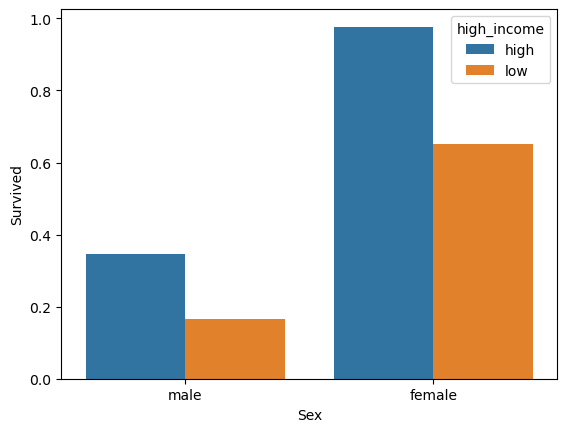

In [27]:
sns.barplot(data=t_survived, x= 'Sex',\
    hue = 'high_income', hue_order = [ 'high', 'low'],\
           order = ['male', 'female'], y='Survived')

### (예진)'Age'의 null 값을 성별 중앙값으로 채워 'Age2'에 저장한 다음 0~9세 'kids' , 10~19세 'teens' , 20~29세 '20s' , 30~39세 '30s' , 40~49세 '40s' , 50세이상 'over 50s'로 묶어서 'Age_group'에 저장하세요. 그리고 'Pclass'의 'Age_group'그룹별로 생존율을 구하세요.

In [28]:
import pandas as pd
import numpy as np

In [29]:
titan=pd.read_csv('titanic/train.csv')

In [30]:
titan.isnull().sum() #Age변수의 null값 확인

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [31]:
titan['Age'].median()

28.0

In [32]:
titan['Age'] = titan['Age'].fillna(28.0) #다른 null값까지 대체되지 않게

In [33]:
titan.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [34]:
titan.rename(columns = {'Age' : 'Age2'}, inplace = True)

In [35]:
titan

,PassengerId,Survived,Pclass,Name,Sex,Age2,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [36]:
titan['Age_group'] = np.where(titan['Age2'] < 9, 'kids',
                     np.where(titan['Age2'] < 19, 'teens',
                     np.where(titan['Age2'] < 29, '20s',
                     np.where(titan['Age2'] < 39, '30s',
                     np.where(titan['Age2'] < 49, '40s', \
                              'over 50s')))))

In [37]:
titan

,PassengerId,Survived,Pclass,Name,Sex,Age2,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,20s
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,30s
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,20s
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,30s
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,30s
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,20s
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,20s
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S,20s
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,20s


In [38]:
titan.assign(Age_group = np.where(titan['Age2'] < 9, 'kids',
                     np.where(titan['Age2'] < 19, 'teens',
                     np.where(titan['Age2'] < 29, '20s',
                     np.where(titan['Age2'] < 39, '30s',
                     np.where(titan['Age2'] < 49, '40s', \
                              'over 50s'))))))

,PassengerId,Survived,Pclass,Name,Sex,Age2,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,20s
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,30s
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,20s
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,30s
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,30s
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,20s
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,20s
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S,20s
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,20s


In [39]:
Pclass_surv=titan.groupby(['Pclass', 'Age_group'])['Survived'].mean() *100

In [40]:
Pclass_surv #groupby의 배열을 바꾸는법??

Pclass  Age_group
1       20s           60.606061
        30s           75.000000
        40s           59.459459
        kids          66.666667
        over 50s      48.979592
        teens         92.307692
2       20s           40.625000
        30s           43.137255
        40s           47.619048
        kids         100.000000
        over 50s      31.578947
        teens         50.000000
3       20s           23.529412
        30s           24.324324
        40s            7.692308
        kids          50.000000
        over 50s       8.333333
        teens         26.666667
Name: Survived, dtype: float64

In [41]:
titan.groupby(['Age_group', 'Pclass'])['Survived'].mean()
# Age_group 변수를 앞에둬서 나이그룹당 Pclass를 보기 편하게
# kids의 값이 약간 다르다 -> kids의 표본이 작을 것이란 가정

Age_group  Pclass
20s        1         0.606061
           2         0.406250
           3         0.235294
30s        1         0.750000
           2         0.431373
           3         0.243243
40s        1         0.594595
           2         0.476190
           3         0.076923
kids       1         0.666667
           2         1.000000
           3         0.500000
over 50s   1         0.489796
           2         0.315789
           3         0.083333
teens      1         0.923077
           2         0.500000
           3         0.266667
Name: Survived, dtype: float64

In [42]:
(titan['Age_group']=='kids').value_counts()

False    837
True      54
Name: Age_group, dtype: int64

In [43]:
((titan['Age_group']=='kids') & (titan['Pclass']==1)).sum()

3

In [44]:
((titan['Age_group']=='kids') & (titan['Pclass']==2)).sum()

17

In [45]:
((titan['Age_group']=='kids') & (titan['Pclass']==3)).sum()

34

In [46]:
import pandas as pd
import numpy as np

In [47]:
titan = pd.read_csv('titanic/train.csv')

In [48]:
titan.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [49]:
titan['Fare'].value_counts().sort_values(ascending=False)

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
32.3208     1
8.3625      1
8.4333      1
25.5875     1
10.5167     1
Name: Fare, Length: 248, dtype: int64

In [50]:
titan['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [51]:
iqr=titan['Fare'].quantile(.75) - titan['Fare'].quantile(.25)

In [52]:
type(titan['Fare'])

pandas.core.series.Series

In [53]:
titan['Fare'].quantile(.25)-(iqr*1.5)

-26.724

In [54]:
titan['Fare'].quantile(.75)+(iqr*1.5)

65.6344

In [55]:
titan['Fare2'] = np.where(titan['Fare'] > (titan['Fare'].quantile(.75)+(iqr*1.5)), None, titan['Fare'])

In [56]:
titan['Fare2'].isnull().sum() #null값 개수 확인(이상치)

116

In [57]:
titan['Fare2'].head(30) #null값확인(이상치)

0        7.25
1        None
2       7.925
3        53.1
4        8.05
5      8.4583
6     51.8625
7      21.075
8     11.1333
9     30.0708
10       16.7
11      26.55
12       8.05
13     31.275
14     7.8542
15       16.0
16     29.125
17       13.0
18       18.0
19      7.225
20       26.0
21       13.0
22     8.0292
23       35.5
24     21.075
25    31.3875
26      7.225
27       None
28     7.8792
29     7.8958
Name: Fare2, dtype: object

In [58]:
titan['Fare2'].describe()

count     775.00
unique    203.00
top         8.05
freq       43.00
Name: Fare2, dtype: float64

In [59]:
titan['Fare2'].quantile(.33) #quantile 을 이용한 하위 33% 구간 값

8.05

In [60]:
titan['Fare_grade'] = np.where(titan['Fare2'] > titan['Fare2'].quantile(.66), "A",
                      np.where(titan['Fare2'] > titan['Fare2'].quantile(.33), "B", "C" ))
                               

In [61]:
titan['Fare_grade']

0      C
1      C
2      C
3      A
4      C
      ..
886    B
887    A
888    A
889    A
890    C
Name: Fare_grade, Length: 891, dtype: object

In [62]:
titan_n = titan.copy()

In [63]:
titan_n.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Fare2', 'Fare_grade'],
      dtype='object')

In [64]:
titan_n[['Fare_grade' , 'Survived']]

,Fare_grade,Survived
0,C,0
1,C,1
2,C,1
3,A,1
4,C,0
...,...,...
886,B,0
887,A,1
888,A,0
889,A,1


In [65]:
Fare_surv=titan_n[['Fare_grade' , 'Survived']]

In [66]:
Fare_surv

,Fare_grade,Survived
0,C,0
1,C,1
2,C,1
3,A,1
4,C,0
...,...,...
886,B,0
887,A,1
888,A,0
889,A,1


In [67]:
Fare_surv.groupby('Fare_grade')['Survived'].mean()

Fare_grade
A    0.462121
B    0.367257
C    0.341646
Name: Survived, dtype: float64

In [68]:
import seaborn as sns

<AxesSubplot:xlabel='Fare_grade', ylabel='Survived'>

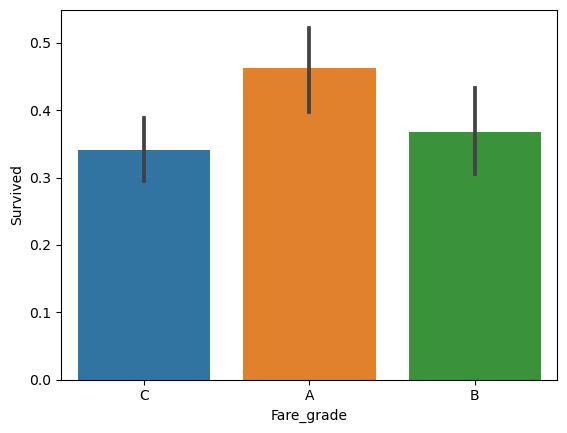

In [69]:
sns.barplot(data=Fare_surv, x='Fare_grade', y = 'Survived')

In [70]:
Fare_surv = Fare_surv.sort_values('Fare_grade')

<AxesSubplot:xlabel='Fare_grade', ylabel='Survived'>

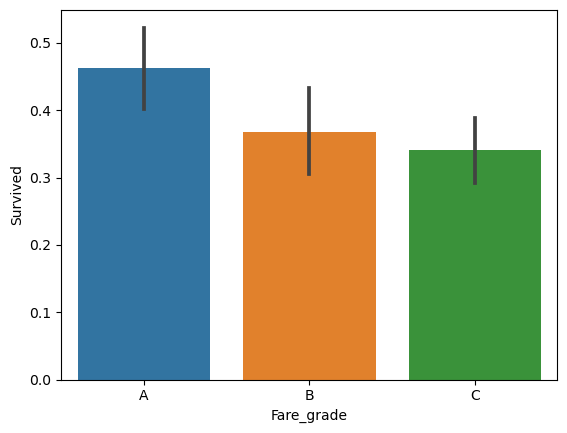

In [71]:
sns.barplot(data=Fare_surv, x='Fare_grade', y = 'Survived')

-----------------------------------

In [72]:
import pandas as pd
import numpy as np

In [73]:
titan=pd.read_csv('titanic/train.csv')

In [74]:
titan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [75]:
titan.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [76]:
titan.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [77]:
titan['Pclass']

0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: Pclass, Length: 891, dtype: int64

In [78]:
titan['Fare']

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

In [79]:
titan['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [80]:
titan['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [81]:
high_income= (titan['Fare']>= 31) & (titan['Pclass'] == 1)

In [82]:
high_income

0      False
1       True
2      False
3       True
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

In [83]:
high_income.value_counts()

False    729
True     162
dtype: int64

In [84]:
titan['high_income'] = high_income

In [85]:
titan_surv = titan.groupby(['high_income', 'Sex'])['Survived'].mean()

In [86]:
titan_surv

high_income  Sex   
False        female    0.651982
             male      0.165339
True         female    0.977011
             male      0.346667
Name: Survived, dtype: float64

In [87]:
import seaborn as sns

In [88]:
sns.barplot(data=titan_surv, x='Sex', y='Survived', hue='high_income')

ValueError: Could not interpret input 'Sex'

In [ ]:
sns.barplot(data=t_survived, x= 'Sex',\
            y='Survived',  hue = 'high_income')

In [ ]:
titan_surv

In [ ]:
sns.barplot(data= titan_surv, x = 'Sex', y='Survived', hue_order = 'high_income')